Wilbert Yo
4212201065

Load image datasets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train_images0 = pd.read_csv('datasets/emnist-bymerge-train.csv')
test_images0 = pd.read_csv('datasets/emnist-bymerge-test.csv')

Create variables and seperate images and labels from datasets

In [6]:
train_images = train_images0.iloc[:,1:].values.reshape(-1,28,28).astype('float32')
train_labels = train_images0.iloc[:,0].values.astype('int')

test_images = test_images0.iloc[:,1:].values.reshape(-1,28,28).astype('float32')
test_labels = test_images0.iloc[:,0].values.astype('int')

Limit number of image datasets

In [8]:
max_images = 1000

if len(train_images) > max_images:
    train_images = train_images[:max_images]
    train_labels = train_labels[:max_images]

if len(test_images) > max_images:
    test_images = test_images[:max_images]
    test_labels = test_labels[:max_images]

HOG Feature Extraction

In [27]:
from skimage.feature import hog

In [116]:
train_features_array=[]
for images in train_images:
    features, _ = hog(images.reshape((28,28)),
                      orientations = 9,
                      pixels_per_cell = (8,8),
                      cells_per_block = (2,2),
                      visualize = True,
                      block_norm = 'L2')
    train_features_array.append(features)
train_features = np.array(train_features_array)

test_features_array=[]
for images in test_images:
    features, _ = hog(images.reshape((28,28)),
                      orientations = 9,
                      pixels_per_cell = (8,8),
                      cells_per_block = (2,2),
                      visualize = True,
                      block_norm = 'L2')
    test_features_array.append(features)
test_features = np.array(test_features_array)

In [117]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [118]:
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

In [119]:
lb = LabelBinarizer()
lb.fit(train_labels)
train_labels_one_hot = lb.transform(train_labels)

lb.fit(test_labels)
test_labels_one_hot = lb.transform(test_labels)

Classify datasets using SVM

In [121]:
from sklearn import svm

In [122]:
clf = svm.SVC()

LOOCV calculation

In [130]:
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [132]:
cv = LeaveOneOut()
predicted_labels = cross_val_predict(clf, test_features_scaled, test_labels, cv=cv)

In [133]:
cv_confusion_matrix = confusion_matrix(test_labels, predicted_labels)
cv_accuracy = accuracy_score(test_labels, predicted_labels)
cv_precision = precision_score(test_labels, predicted_labels, average=None)
cv_recall = recall_score(test_labels, predicted_labels, average=None)
cv_f1 = f1_score(test_labels, predicted_labels, average=None)

C:\Users\Wilbert Yo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [134]:
print("LOOCV Results :")
print("Confusion Matrix :")
print(cv_confusion_matrix)
print("\nAccuracy :")
print(cv_accuracy)
print("\nPrecision:")
print(cv_precision)
print("\nRecall   :")
print(cv_recall)
print("\nF1 Score :")
print(cv_f1)

LOOCV Results :
Confusion Matrix :
[[42  1  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  0]
 [ 1  0 42 ...  0  0  0]
 ...
 [ 1  1  0 ...  0  0  0]
 [ 0  0  1 ...  0 16  0]
 [ 0  0  1 ...  0  0 16]]

Accuracy :
0.645

Precision:
[0.4516129  0.55238095 0.73684211 0.72727273 0.67142857 0.64444444
 0.76       0.85714286 0.47058824 0.74545455 0.         0.
 0.8        0.         0.         0.53846154 0.         0.
 0.66666667 0.66666667 1.         0.34375    0.8        0.71428571
 0.42857143 0.66666667 0.         1.         0.77358491 0.8
 0.82352941 0.5        0.33333333 0.         0.83333333 0.
 1.         0.         0.9        0.66666667 0.         0.
 0.         0.9        0.         0.57142857 0.61538462]

Recall   :
[0.75       0.93548387 0.93333333 0.88888889 0.90384615 0.70731707
 0.9047619  0.94117647 0.66666667 0.83673469 0.         0.
 0.44444444 0.         0.         0.46666667 0.         0.
 0.0952381  0.18181818 0.55555556 0.32352941 0.83333333 0.45454545
 0.31578947 0.30769231 0.   

Generate Matrix Figure for Confusion Matrix

In [136]:
from mlxtend.plotting import plot_confusion_matrix

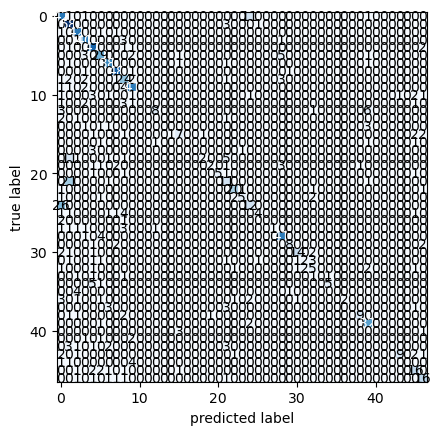

In [137]:
fig, ax = plot_confusion_matrix(conf_mat=cv_confusion_matrix)

Original Images vs HOG Feature Images

In [139]:
def extract_hog_images(images):
    hog_images = []
    for image in images:
        _, hog_img = hog(image.reshape((28, 28)),
                         orientations=9,
                         pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2),
                         visualize=True,
                         block_norm='L2')
        hog_images.append(hog_img)
    return np.array(hog_images)

In [140]:
def plot_images_with_hog(images):
    hog_images = extract_hog_images(images)
    
    fig, axes = plt.subplots(2, 10, figsize=(15, 5))

    # Plot original images
    for i in range(min(len(images), 10)):
        axes[0, i].imshow(images[i].reshape((28, 28)), cmap='gray')
        axes[0, i].axis('off')

    # Plot HOG images
    for i in range(min(len(hog_images), 10)):
        axes[1, i].imshow(hog_images[i].reshape((28, 28)), cmap='gray')
        axes[1, i].axis('off')

    plt.show()

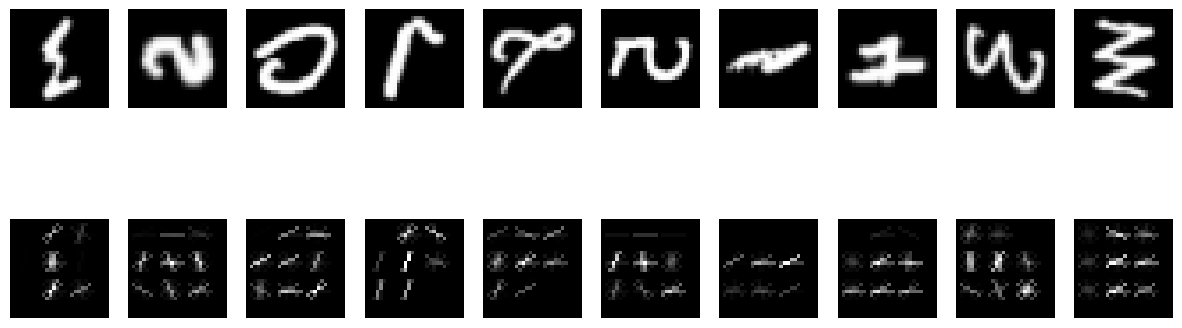

In [150]:
plot_images_with_hog(test_images)

MK511 - Machine Vision - Asesmen Tengah Semester